In [ ]:
!pip install statsmodels

In [195]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
frames = pd.read_csv('frames.csv')
frames.head()

,file_date,file_time,frame_type,n_mas,board_time,data_frames_num,pl0,voltage0,current0,input_states0,...,pl_errors6,pl_status6,pl7,voltage7,current7,input_states7,output_states7,temperature7,pl_errors_num7,pl_errors7
0,20201031,14144,data_frame,5,NaN,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20201031,14144,tm_frame,6,656349.0,7,1.0,0.125,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20201031,14144,data_frame,6,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20201031,14144,data_frame,6,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20201031,14144,data_frame,6,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
frames['file_date'] = pd.to_datetime(frames['file_date'].apply(str)).dt.date
frames['file_time'] = frames['file_time'].apply(str).str.rjust(6, '0').apply(lambda x: x[0:5]).\
                    apply(lambda x: datetime.strptime(x, '%H%M%S').time())
frames['board_time'] = pd.to_datetime(frames['board_time'], unit='s', origin=pd.Timestamp('2000-01-01'))

In [4]:
frames.head(10)

,file_date,file_time,frame_type,n_mas,board_time,data_frames_num,pl0,voltage0,current0,input_states0,...,pl_errors6,pl_status6,pl7,voltage7,current7,input_states7,output_states7,temperature7,pl_errors_num7,pl_errors7
0,2020-10-31,01:41:04,data_frame,5,NaT,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-31,01:41:04,tm_frame,6,2000-01-08 14:19:09,7,1.0,0.125,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-31,01:41:04,data_frame,6,NaT,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-31,01:41:04,data_frame,6,NaT,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-31,01:41:04,data_frame,6,NaT,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-31,01:41:04,data_frame,6,NaT,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-10-31,01:41:04,data_frame,6,NaT,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-10-31,01:41:04,data_frame,6,NaT,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-10-31,01:41:04,data_frame,6,NaT,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-10-31,01:41:04,tm_frame,7,2000-01-08 14:23:42,7,2.0,0.125,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_frames_nums = frames.groupby('n_mas')['frame_type'].nunique()
data_frames_nums = data_frames_nums[data_frames_nums > 1]
correct_n_mass = data_frames_nums.index

In [6]:
filtered_frames = frames[frames.n_mas.isin(correct_n_mass)]
real_data_frames_num = filtered_frames.groupby('n_mas').count()['data_frames_num']
pls = filtered_frames[filtered_frames['frame_type'] == 'tm_frame'][['n_mas', 'pl0', 'pl1']]\
    .drop_duplicates().reset_index()

In [7]:
filtered_frames.head()

,file_date,file_time,frame_type,n_mas,board_time,data_frames_num,pl0,voltage0,current0,input_states0,...,pl_errors6,pl_status6,pl7,voltage7,current7,input_states7,output_states7,temperature7,pl_errors_num7,pl_errors7
1,2020-10-31,01:41:04,tm_frame,6,2000-01-08 14:19:09,7,1.0,0.125,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-31,01:41:04,data_frame,6,NaT,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-31,01:41:04,data_frame,6,NaT,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-31,01:41:04,data_frame,6,NaT,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-31,01:41:04,data_frame,6,NaT,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(len(real_data_frames_num), len(pls))

1225 1225


In [9]:
frame_nums = {
    'PLA': 8,
    'PLB': 8,
    'PLG': 22,
    'PLT': 2,
    'PLAB': 14
}


lost_frames = 0
for index, row in pls.iterrows():
    real_num = real_data_frames_num.iloc[index]
    pl0_num = row.pl0
    pl1_num = row.pl1
    
    if pl0_num == pl1_num == 1.0 or pl0_num == pl1_num == 2.0 :
        lost_frames += frame_nums['PLA'] - real_num
    elif pl0_num == pl1_num == 3.0 :
        lost_frames += frame_nums['PLG'] - real_num 
    elif pl0_num == pl1_num == 4.0 : 
        lost_frames += frame_nums['PLT'] - real_num 
    else:
        lost_frames += frame_nums['PLAB'] - real_num        

print(f'lost frames: {lost_frames}/{len(frames) + lost_frames} ({lost_frames/(len(frames) + lost_frames) * 100} %)')

lost frames: 1076/14486 (7.427861383404667 %)


In [210]:
tm_frames = filtered_frames[filtered_frames['frame_type'] == 'tm_frame']

In [211]:
temperature_columns = np.append([],[list(map(lambda x: x + str(i), ['pl', 'temperature'])) for i in range(8)])
tm_frames[temperature_columns].head()

,pl0,temperature0,pl1,temperature1,pl2,temperature2,pl3,temperature3,pl4,temperature4,pl5,temperature5,pl6,temperature6,pl7,temperature7
1,1.0,9.0,1.0,9.0,1.0,11.0,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.0,12.0,2.0,12.0,2.0,13.0,2.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,3.0,11.0,3.0,10.0,3.0,10.0,3.0,11.0,3.0,11.0,3.0,29.0,3.0,29.0,3.0,29.0
36,4.0,5.0,4.0,5.0,4.0,5.0,4.0,6.0,4.0,6.0,4.0,7.0,4.0,7.0,4.0,8.0
38,1.0,15.0,2.0,12.0,1.0,15.0,2.0,12.0,1.0,17.0,2.0,14.0,1.0,29.0,2.0,27.0


In [212]:
pl_columns = np.append([], [list(map(lambda x: x + str(i), ['pl'])) for i in range(8)])
pl_columns

array(['pl0', 'pl1', 'pl2', 'pl3', 'pl4', 'pl5', 'pl6', 'pl7'],
      dtype='<U32')

In [209]:
#pl1_tm_frames = tm_frames[(tm_frames[pl_columns] == 1.0).any(axis=1)][temperature_columns]

In [213]:
df_temperature = pd.DataFrame({})

for index, row in tm_frames[temperature_columns].iterrows():
    tmp = pd.DataFrame({})
    pl_nums = []
    temperatures = []
    for i in range(8):
        pl_nums.append(eval(f'row.pl{i}'))
        temperatures.append(eval(f'row.temperature{i}'))
        
    tmp_df = pd.DataFrame({'pl': pl_nums, 'temperature': temperatures})
    df_temperature = df_temperature.append(tmp_df)
    
df_temperature = df_temperature.dropna()
df_temperature['samples'] = range(len(df_temperature))

In [214]:
df_temperature.head()

,pl,temperature,samples
0,1.0,9.0,0
1,1.0,9.0,1
2,1.0,11.0,2
3,1.0,25.0,3
0,2.0,12.0,4


In [215]:
temperature = pd.DataFrame({'sample': range(len(pl1_temperatures)), 'pl1': pl1_temperatures, 'pl2': pl2_temperatures})
temperature.head()

,sample,pl1,pl2
0,0,9.0,12.0
1,1,9.0,12.0
2,2,11.0,13.0
3,3,25.0,27.0
4,4,15.0,12.0


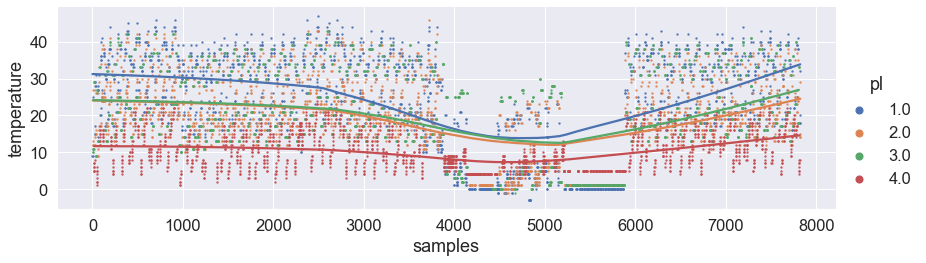

In [216]:
#sns.set(rc = {'figure.figsize':(15,5)})
temperature_plot = sns.lmplot(
    x='samples', 
    y='temperature', 
    data=df_temperature, 
    hue='pl', 
    lowess=True, 
    scatter_kws={"s": 2}, 
    height=4,
    aspect=3
)

for lh in temperature_plot._legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([50])